In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
URL = "https://github.com/ageron/handson-ml2/blob/master/datasets/housing/housing.csv?raw=true"
df = pd.read_csv(URL)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
from sklearn.model_selection import StratifiedShuffleSplit

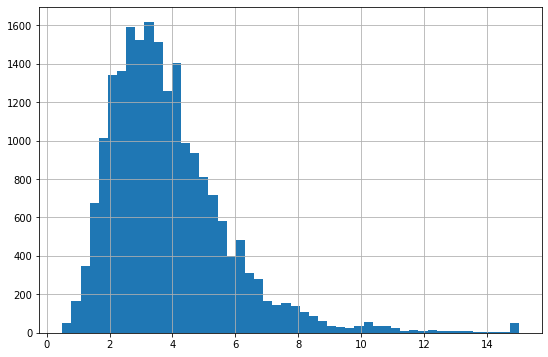

In [4]:
%matplotlib inline
df['median_income'].hist(bins=50,figsize=(9,6))
plt.show()

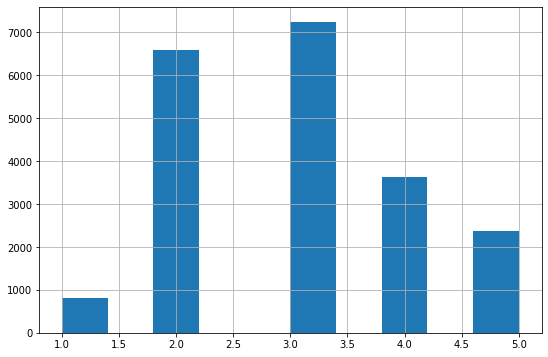

In [5]:
df['income_cat'] = pd.cut(df['median_income'],bins=[0.,1.5,3.0,4.5,6.0,np.inf],labels=[1,2,3,4,5])
df['income_cat'].hist(figsize=(9,6))
plt.show()

In [6]:
stratified_split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

In [7]:
for train_index,test_index in stratified_split.split(df,df['income_cat']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [8]:
strat_test_set.drop('income_cat', axis=1, inplace=True)
strat_train_set.drop('income_cat', axis=1, inplace=True)

In [9]:
housing = strat_train_set.copy()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


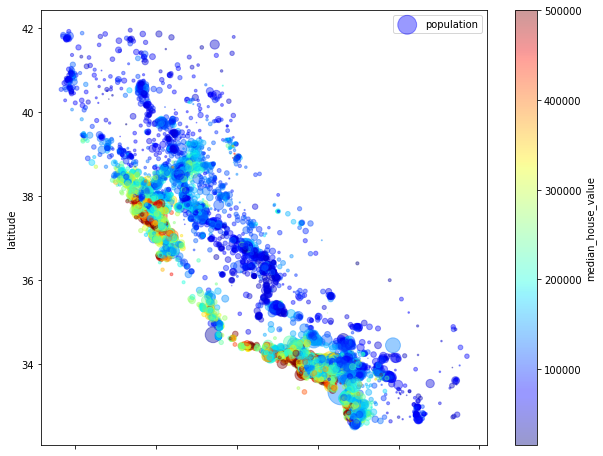

In [14]:
housing.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    alpha=0.4,
    s=housing['population']/50,
    label="population",
    c="median_house_value",
    cmap="jet",
    colorbar=True,
    figsize=(10,8))
plt.show()

In [16]:
housing.corrwith(housing['median_house_value']).sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
dtype: float64

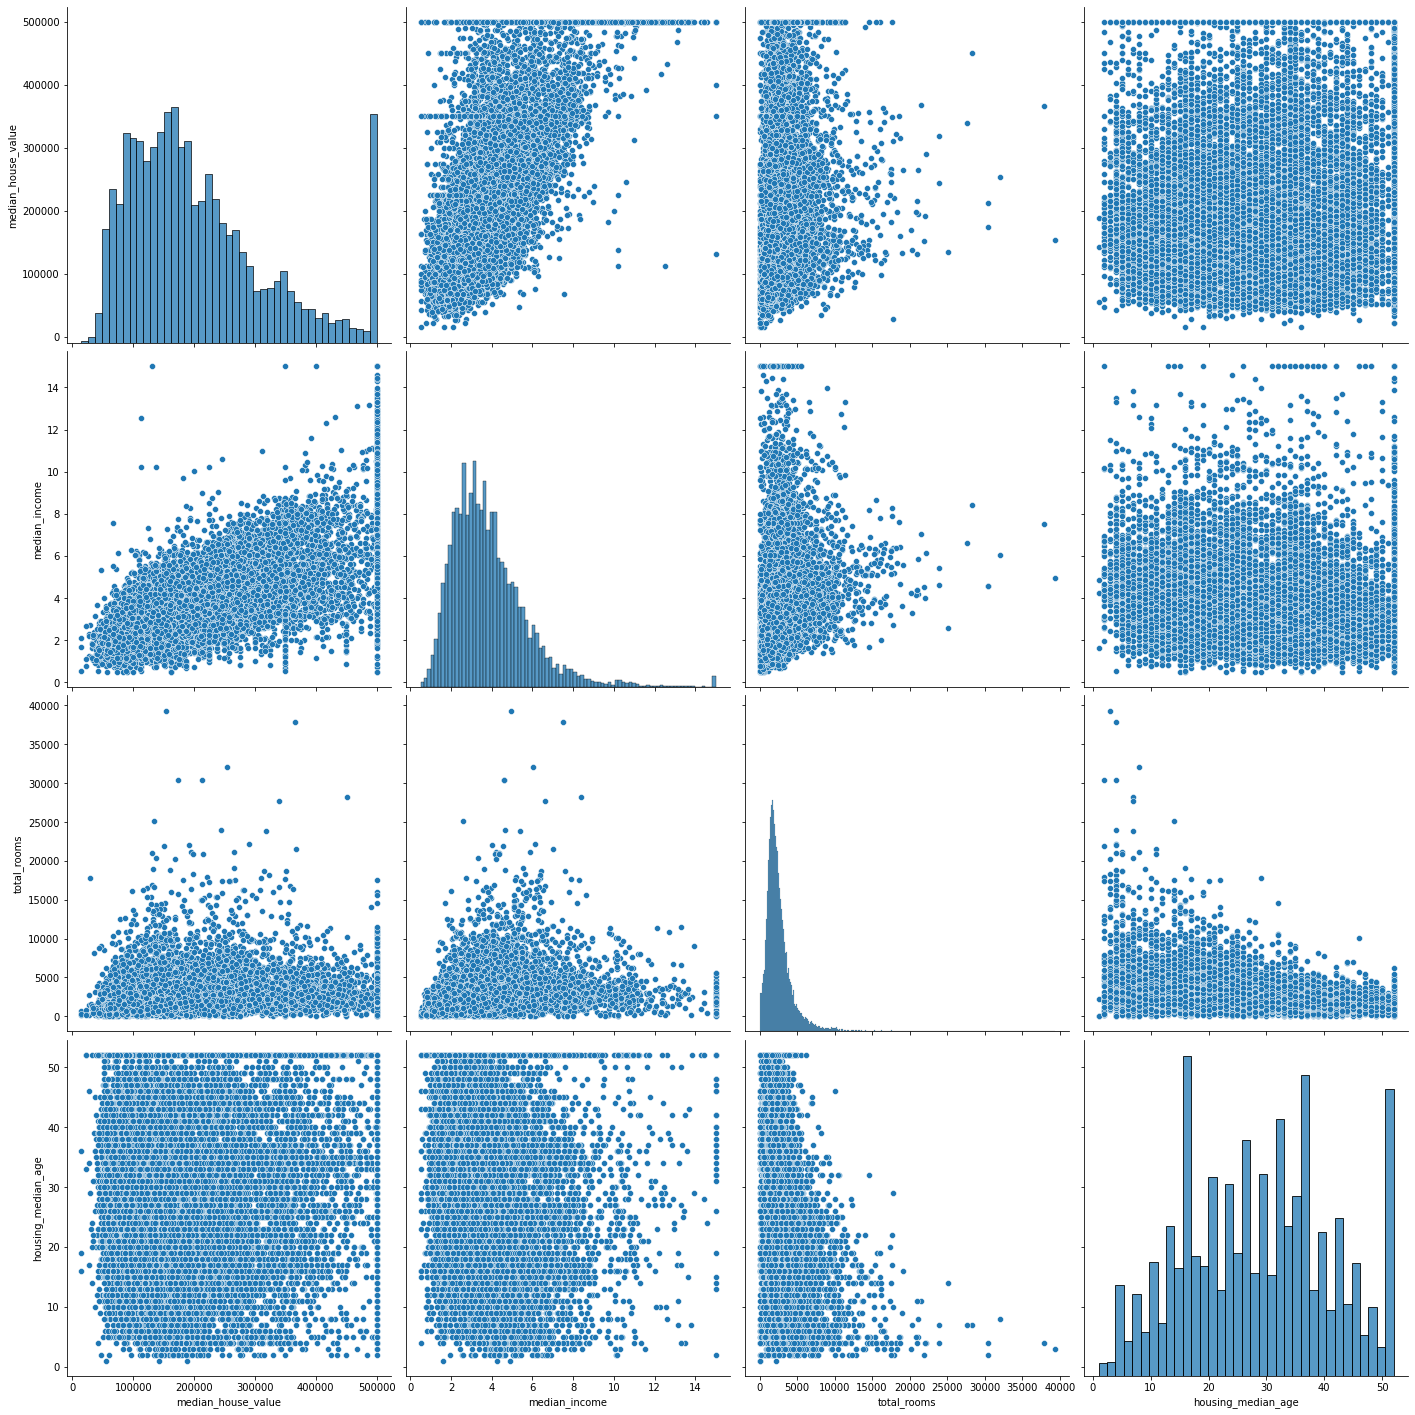

In [17]:
cols = ['median_house_value','median_income','total_rooms','housing_median_age']
sns.pairplot(housing[cols],height=5)
plt.show()